Problem statement:

Situation: Energy is produced in different forms and consumed by the regions in different rates.   

Complication: Energy prices are increasing due to many reasons including but not limited to war, logistics and sanctions.   

Question: Is it possible to see what types of energy have been historically produced and consumed by the different regions? Is it possible to predict how the productions and consumption will look like in the future?   

Answer: ???


# Beskrivande analys av data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import streamlit as st
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

# from jupyter_dash import JupyterDash
# from dash import Dash, dcc, html, Input, Output


In [45]:
leveranser_flytande = pd.read_table('../data/to-use/leveranser-flytande-bransle-region-ar.csv', sep=',')
elproduction_bransleanvandning = pd.read_table('../data/to-use/elproduction-bransleanvandning-region-produktionssatt-bransletyp-ar.csv', sep=',')
fjarrvarmeproduktion = pd.read_table('../data/to-use/fjarrvarmeproduktion-region-produktionssatt-bransletyp-ar.csv', sep=',')
slutanvandning = pd.read_table('../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')
branslefarbrukning = pd.read_table('../data/to-use/branslefarbrukning-far-produktion-per-ar.csv', sep=',')
energidata = pd.read_table('../data/to-use/energidata-per-ar.csv', sep=',')


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_8504\3087391659.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  slutanvandning = pd.read_table('../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')


## Datasets
### leveranser_flytande 
> Leveranser av bränsle, kubikmeter efter region, bränsletyp, färbrukarkategori och är
### elproduction_bransleanvandning 
> Elproduktion och bränsleanvändning(MWh) efter region, produktionssätt, bränsletyp och är
### fjarrvarmeproduktion 
> Fjärrvärmeproduktion och bränsleanvändning (MWh) efter region, produktionssätt, bränsletyp och är
### slutanvandning 
> Slutanvändning (MWh) efter region, förbrukarkategori, bränsletyp och är
### branslefarbrukning 
> Bränslefärbrukning fär produktion av ånga och hetvatten, TJ efter produktionsslag, bränsletyp och är
### energidata 
> Energidata (MWh) efter region, kategori, energityp och år

In [46]:
datasets = [leveranser_flytande, elproduction_bransleanvandning, 
            fjarrvarmeproduktion, slutanvandning, branslefarbrukning, energidata]

variables = ['region', 'bransletyp', 'ar', 'm3', 'farbrukarkategori', 'produktionssatt',
             'MWh', 'kategori', 'energityp', 'produktionsslag', 'branslefarbrukning']



## Datakorrigering

In [47]:
for d in datasets:
    d.ar = d.ar.astype(int)

In [48]:
for d in datasets:
    name = [x for x in globals() if globals()[x] is d][0]
    print('Dataframe: ', name)
    
    contains_nulls = d.isna().sum()
    print('Number of Nuls: ', contains_nulls, 'out of', len(d))
    # print(d.describe(include='object'))



Dataframe:  leveranser_flytande
Number of Nuls:  region                      0
bransletyp                  0
ar                          0
m3                     139680
forbrukarkategori       74494
fornybar_bransletyp         0
dtype: int64 out of 353854
Dataframe:  elproduction_bransleanvandning
Number of Nuls:  region                      0
produktionssatt             0
bransletyp                  0
ar                          0
MWh                         0
fornybar_bransletyp         0
fornybar_produktionssatt    0
dtype: int64 out of 194832
Dataframe:  fjarrvarmeproduktion
Number of Nuls:  region                           0
produktionssatt                  0
bransletyp                       0
ar                               0
MWh                         419328
fornybar_bransletyp              0
fornybar_produktionssatt         0
dtype: int64 out of 917532
Dataframe:  slutanvandning
Number of Nuls:  region                      0
forbrukarkategori      159390
bransletyp           

En av de första sakerna som behöver göras är att ta itu med NA:s värderingar. I det här fallet använde vi olika typer av imputering

- leveranser_flytande,m3: fillna (fffill)
- fjarrvarmeproduktion: interpolate
- slutanvandning: Not used since nore than one columns have NAs that are categorical - dabading using this dataframe at all; considering it needs reworking in the merging phase.
- energidata.MWh: fillna (fffill)

In [49]:
leveranser_flytande.m3 = leveranser_flytande.m3.fillna(method='ffill'); print('leveranser_flytande: Number of Nuls: ', leveranser_flytande.isna().sum().sum(), 'out of', len(leveranser_flytande))
fjarrvarmeproduktion.MWh = fjarrvarmeproduktion.MWh.interpolate(); print('fjarrvarmeproduktion: Number of Nuls: ', fjarrvarmeproduktion.isna().sum().sum(), 'out of', len(fjarrvarmeproduktion))
# slutanvandning = slutanvandning.fillna('fffill'); print('slutanvandning: Number of Nuls: ', slutanvandning.isna().sum().sum(), 'out of', len(slutanvandning))
energidata.MWh = energidata.MWh.fillna(method='ffill'); print('energidata: Number of Nuls: ', energidata.isna().sum().sum(), 'out of', len(energidata))


leveranser_flytande: Number of Nuls:  74494 out of 353854
fjarrvarmeproduktion: Number of Nuls:  0 out of 917532
energidata: Number of Nuls:  0 out of 4941090


In [50]:
leveranser_flytande


,region,bransletyp,ar,m3,forbrukarkategori,fornybar_bransletyp
0,00 Riket,motorbensin,2001,5442.6,NaN,icke-fornybar
1,00 Riket,dieselbr�nsle,2001,3530.0,NaN,icke-fornybar
2,00 Riket,etanol,2001,0.0,NaN,fornybar
3,00 Riket,E85,2001,0.0,NaN,icke-fornybar
4,00 Riket,FAME,2001,0.0,NaN,fornybar
...,...,...,...,...,...,...
353849,2584 Kiruna,HVO,2021,0.0,flerbostadshus,fornybar
353850,2584 Kiruna,HVO,2021,0.0,�vriga fastigheter,fornybar
353851,2584 Kiruna,HVO,2021,199.0,v�gtransporter,fornybar
353852,2584 Kiruna,HVO,2021,0.0,"bygg, luftfart, j�rnv�g, bunkring",fornybar


In [51]:
leveranser_flytande_group = leveranser_flytande.groupby(['region', 'ar', 'fornybar_bransletyp'], as_index=False
                 ).agg(
                        Mean=('m3', np.mean),
                        Sum=('m3', np.sum), 
                        Avg=('m3', np.average),
                        Count=('m3', 'count'),
                        Max=('m3', np.max),
                        Min=('m3', np.min)
                 ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# temp['col'] = temp.region + temp.ar.astype(str) + temp.fornybar_bransletyp


In [52]:

# # leveranser_flytande_group.Count.where(leveranser_flytande_group.Count.gt(0)).min(0)
# leveranser_flytande_group.Count.where(leveranser_flytande_group.Count.gt(0)).max(0)


In [53]:
leveranser_flytande_group.region.tail(20).drop_duplicates(keep='first').reset_index(drop=True)


0       1484 Lysekil
1      1780 Karlstad
2    0581 Norrk�ping
3     0680 J�nk�ping
4     0180 Stockholm
5      1480 G�teborg
Name: region, dtype: object

In [55]:
leveranser_flytande_group = leveranser_flytande_group.where(leveranser_flytande_group.region.isin(
    ["1484 Lysekil", "1780 Karlstad", "0581 Norrk�ping", "0680 J�nk�ping", "0180 Stockholm", "1480 G�teborg"])).dropna().reset_index(drop=True)

# leveranser_flytande_group = leveranser_flytande_group[['region','ar', 'fornybar_bransletyp', 'Sum']]

leveranser_flytande_group.ar = leveranser_flytande_group.ar.astype(int)

# leveranser_flytande_group['col'] = leveranser_flytande_group.ar.astype(str) + leveranser_flytande_group.fornybar_bransletyp

# leveranser_flytande_group = leveranser_flytande_group.pivot(index='col', columns='region', values='Sum')

# leveranser_flytande_group = leveranser_flytande_group.pivot(index=['ar', 'region'], columns='fornybar_bransletyp', values='Sum')


leveranser_flytande_group

for region in leveranser_flytande_group.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    data = leveranser_flytande_group[leveranser_flytande_group.region == region].reset_index(drop=True)
    fig = sns.lineplot(data=data, x=data.ar.astype(
        int), y='Sum', hue='fornybar_bransletyp', style='fornybar_bransletyp')

    plt.show(fig)


<AxesSubplot:xlabel='ar', ylabel='Sum'>

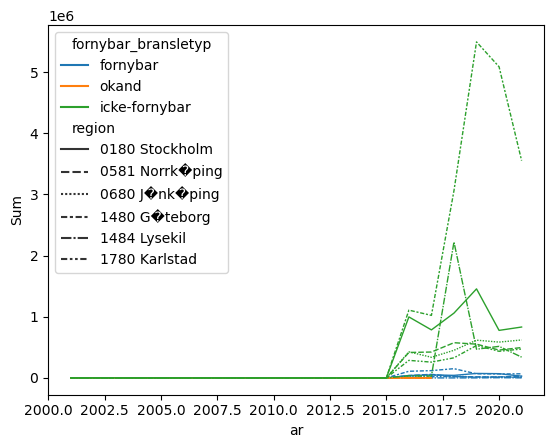

In [23]:
# sns.lineplot(data=leveranser_flytande_group, x='ar',
#              y='Sum', hue='fornybar_bransletyp', style='region', estimator=None, sort=True, lw=1, legend="full")


In [50]:
# regions_selection = widgets.SelectMultiple(
#     options=list(leveranser_flytande.region.drop_duplicates(
#         keep='first').reset_index(drop=True)),
#     rows=20,
#     description='Region:',
#     disabled=False,
# )
# display(regions_selection)

# rs = pd.Series(regions_selection.value)
# rs

# data = leveranser_flytande.where(
#     leveranser_flytande.region.isin(rs)).dropna().reset_index(drop=True)

# fuel_selection = widgets.SelectMultiple(
#     options=list(data.bransletyp.drop_duplicates(
#         keep='first').reset_index(drop=True)),
#     rows=20,
#     description='Region:',
#     disabled=False,
# )
# display(fuel_selection)


# leveranser_flytande = leveranser_flytande.set_index(leveranser_flytande.region, drop=True, inplace=True)


# fig1 = sns.lineplot(data=d, x='ar',
#                     y='region', hue='fornybar_bransletyp')
# plt.show(fig1)

# rs = pd.Series(regions_selection.value)
# rs
# # leveranser_flytande = leveranser_flytande.set_index(leveranser_flytande.region, drop=True, inplace=True)
# d = leveranser_flytande.where(leveranser_flytande.region.isin(rs)).dropna().reset_index(drop=True)

# d
# # leveranser_flytande


# fig1 = sns.lineplot(data=leveranser_flytande.where(leveranser_flytande.region == regions_selection.value), x='ar',
#                     y='region', hue='fornybar_bransletyp')
# plt.show(fig1)

        # print('Column: ', column, '\n', d[column].drop_duplicates(
        #     keep='first').reset_index(drop=True))

        # fig1 = sns.lineplot(data=d, x='ar', y=d[column])

        # # fig2 = sns.lineplot(data=d, x='ar', y=d[column], hue='region')
        # # plt.show(fig2)


    
